In [1]:
# !conda create -n tensorflow pip python=3.5
# !source activate tensorflow
!pip install --upgrade tensorflow

    100% |████████████████████████████████| 58.4MB 17kB/s  eta 0:00:01
Requirement not upgraded as not directly required: six>=1.10.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow)
    100% |████████████████████████████████| 9.3MB 111kB/s eta 0:00:01
Requirement not upgraded as not directly required: wheel>=0.26 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow)
    100% |████████████████████████████████| 1.1MB 914kB/s eta 0:00:01
Requirement not upgraded as not directly required: setuptools<=39.1.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow)
    100% |████████████████████████████████| 3.3MB 328kB/s eta 0:00:01
Requirement not upgraded as not directly required: numpy<=1.14.5,>=1.13.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow)
    100% |████████████████████████████████| 92kB 8.8MB/s eta 0:00:01
Requirement not upgraded as not directly required: werkzeug>=0.11.10

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

1.10.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

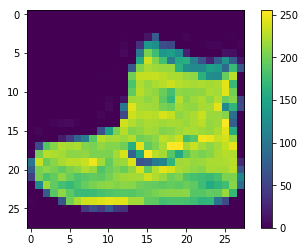

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

x_train = train_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)

In [10]:
def plot_history(histories, key='loss'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.5023 - acc: 0.8226
Epoch 2/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3775 - acc: 0.8629
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3403 - acc: 0.8764
Epoch 4/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3151 - acc: 0.8839
Epoch 5/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.2952 - acc: 0.8905


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 28us/step
Test accuracy: 0.8766


In [14]:
predictions = model.predict(test_images)

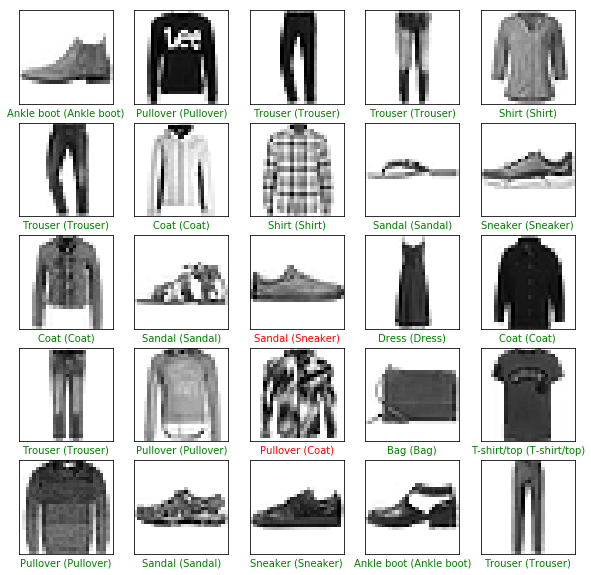

In [15]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

In [16]:
img = test_images[0]
img = (np.expand_dims(img,0))

predictions = model.predict(img)
print(predictions)

prediction = predictions[0]
np.argmax(prediction)

[[  7.43200007e-06   8.47868691e-08   9.69829216e-07   1.19922038e-06
    4.84684369e-06   3.41150165e-03   4.20128563e-05   5.31542525e-02
    1.92681458e-04   9.43184972e-01]]


9

In [17]:
baseline_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

baseline_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

baseline_model.summary()

baseline_history = baseline_model.fit(train_images,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 1s - loss: 0.6881 - acc: 0.7726 - val_loss: 0.5137 - val_acc: 0.8226
Epoch 2/20
 - 1s - loss: 0.4573 - acc: 0.8432 - val_loss: 0.4718 - val_acc: 0.8379
Epoch 3/20
 - 1s - loss: 0.4134 - acc: 0.8572 - val_loss: 0.4340 - val_acc: 0.8483
Epoch 4/20
 - 1s - loss: 0.3850 - acc: 0.8662 - val_loss: 0.4189 - val_acc: 0.8527
Epoch 5/20
 - 1s -

In [18]:
smaller_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

smaller_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

smaller_model.summary()

smaller_history = smaller_model.fit(train_images,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 1s - loss: 0.9251 - acc: 0.6976 - val_loss: 0.6089 - val_acc: 0.7933
Epoch 2/20
 - 1s - loss: 0.5333 - acc: 0.8220 - val_loss: 0.5249 - val_acc: 0.8183
Epoch 3/20
 - 1s - loss: 0.4747 - acc: 0.8387 - val_loss: 0.4961 - val_acc: 0.8269
Epoch 4/20
 - 1s - loss: 0.4418 - acc: 0.8490 - val_loss: 0.4635 - val_acc: 0.8395
Epoch 5/20
 - 1s - l

In [19]:
larger_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

larger_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

larger_model.summary()

larger_history = larger_model.fit(train_images,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.5919 - acc: 0.8005 - val_loss: 0.4849 - val_acc: 0.8331
Epoch 2/20
 - 1s - loss: 0.4158 - acc: 0.8555 - val_loss: 0.4261 - val_acc: 0.8459
Epoch 3/20
 - 1s - loss: 0.3720 - acc: 0.8691 - val_loss: 0.3912 - val_acc: 0.8595
Epoch 4/20
 - 1s - loss: 0.3468 - acc: 0.8770 - val_loss: 0.3862 - val_acc: 0.8605
Epoch 5/20
 - 1s -

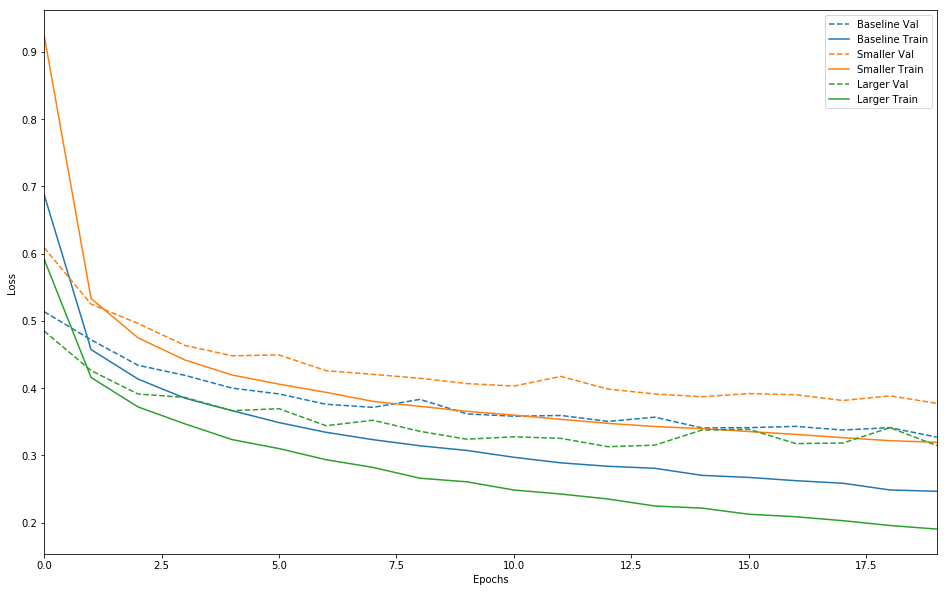

In [20]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('larger', larger_history)])

In [21]:
l2_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

l2_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

l2_model.summary()

l2_history = l2_model.fit(train_images,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 1.0558 - acc: 0.7912 - val_loss: 0.8122 - val_acc: 0.8328
Epoch 2/20
 - 1s - loss: 0.7116 - acc: 0.8485 - val_loss: 0.6753 - val_acc: 0.8413
Epoch 3/20
 - 2s - loss: 0.6007 - acc: 0.8595 - val_loss: 0.5842 - val_acc: 0.8562
Epoch 4/20
 - 1s - loss: 0.5307 - acc: 0.8679 - val_loss: 0.5655 - val_acc: 0.8450
Epoch 5/20
 - 1s -

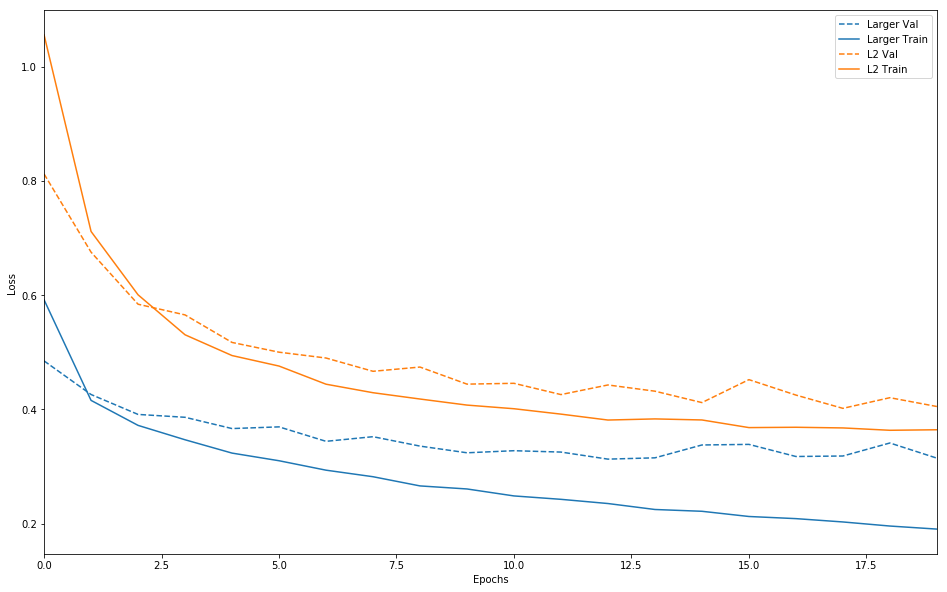

In [22]:
plot_history([('larger', larger_history),
              ('l2', l2_history)])

In [23]:
dpt_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

dpt_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

dpt_model.summary()

dpt_history = dpt_model.fit(train_images,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.6704 - acc: 0.7667 - val_loss: 0.4896 - val_acc: 0.8268
Epoch 2/20
 - 2s - loss: 0.4597 - acc: 0.8390 - val_loss: 0.4336 - val_acc: 0.8442
Epoch 3/20
 - 2s - loss: 0.4104 - acc: 0.8544 - val_

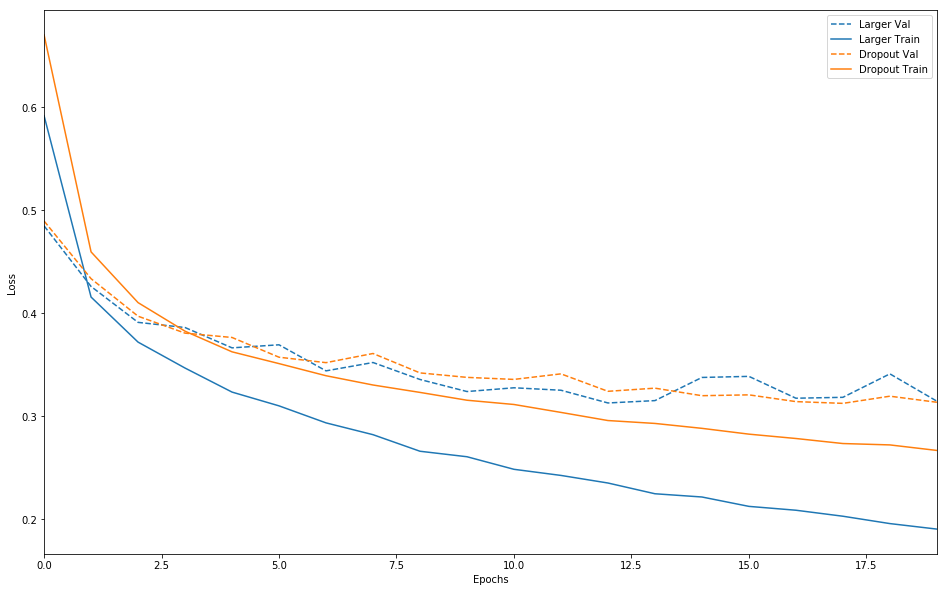

In [24]:
plot_history([('larger', larger_history),
              ('dropout', dpt_history)])

In [25]:
adv_model = keras.Sequential()
adv_model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=(28, 28, 1)))
adv_model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=(28, 28, 1)))
adv_model.add(keras.layers.MaxPooling2D(pool_size=2))
adv_model.add(keras.layers.Dropout(0.5))
adv_model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu'))
adv_model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu'))
adv_model.add(keras.layers.MaxPooling2D(pool_size=2))
adv_model.add(keras.layers.Dropout(0.5))
adv_model.add(keras.layers.Flatten())
adv_model.add(keras.layers.Dense(256, activation='relu'))
adv_model.add(keras.layers.Dense(10, activation='softmax'))

adv_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

adv_model.summary()

adv_history = adv_model.fit(x_train,
                              train_labels,
                              epochs=20,
                              batch_size=64,
                              validation_data=(x_test, test_labels),
                              verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
__________

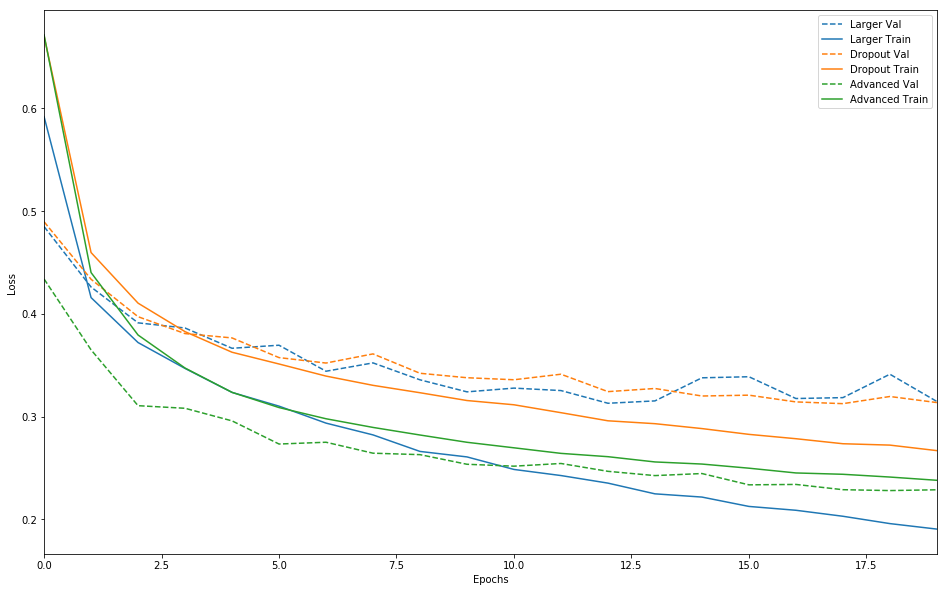

In [26]:
plot_history([('larger', larger_history),
              ('dropout', dpt_history),
              ('advanced', adv_history)])

In [27]:
adv_nodrpt_model = keras.Sequential()

adv_nodrpt_model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=(28, 28, 1)))
adv_nodrpt_model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=(28, 28, 1)))
adv_nodrpt_model.add(keras.layers.MaxPooling2D(pool_size=2))

adv_nodrpt_model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu'))
adv_nodrpt_model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu'))
adv_nodrpt_model.add(keras.layers.MaxPooling2D(pool_size=2))

adv_nodrpt_model.add(keras.layers.Flatten())
adv_nodrpt_model.add(keras.layers.Dense(256, activation='relu'))
adv_nodrpt_model.add(keras.layers.Dense(10, activation='softmax'))

adv_nodrpt_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

adv_nodrpt_model.summary()

x_train = train_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)
adv_nodrpt_history = adv_nodrpt_model.fit(x_train,
                              train_labels,
                              epochs=20,
                              batch_size=64,
                              validation_data=(x_test, test_labels),
                              verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 576)               0         
__________

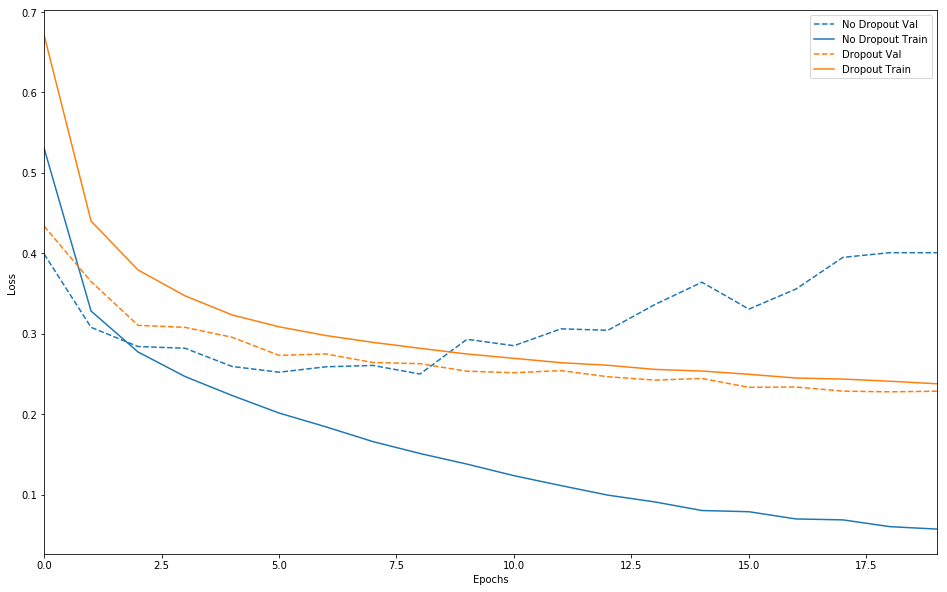

In [28]:
plot_history([('No Dropout', adv_nodrpt_history),
              ('Dropout', adv_history)])

In [29]:
checkpoint_path = "training_0/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)

model.fit(train_images, train_labels,  
          epochs = 5, 
          validation_data = (test_images,test_labels),
          callbacks = [cp_callback]) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.2826 - acc: 0.8953 - val_loss: 0.3342 - val_acc: 0.8779

Epoch 00001: saving model to training_0/cp.ckpt
Epoch 2/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.2683 - acc: 0.9000 - val_loss: 0.3488 - val_acc: 0.8737

Epoch 00002: saving model to training_0/cp.ckpt
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.2599 - acc: 0.9036 - val_loss: 0.3225 - val_acc: 0.8878

Epoch 00003: saving model to training_0/cp.ckpt
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.2492 - acc: 0.9073 - val_loss: 0.3333 - val_acc: 0.8814

Epoch 00004: saving model to training_0/cp.ckpt
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2414 - acc: 0.9094 - val_loss: 0.3359 - val_acc: 0.8827

Epoch 00005: saving model to training_0/cp.ckpt


In [30]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)


datagen.fit(x_train)

In [31]:
dg_model = keras.Sequential()
dg_model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=(28, 28, 1)))
dg_model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=(28, 28, 1)))
dg_model.add(keras.layers.MaxPooling2D(pool_size=2))
dg_model.add(keras.layers.Dropout(0.5))
dg_model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu'))
dg_model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu'))
dg_model.add(keras.layers.MaxPooling2D(pool_size=2))
dg_model.add(keras.layers.Dropout(0.5))
dg_model.add(keras.layers.Flatten())
dg_model.add(keras.layers.Dense(256, activation='relu'))
dg_model.add(keras.layers.Dense(10, activation='softmax'))

dg_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

dg_model.summary()

dg_history = dg_model.fit_generator(datagen.flow(x_train, train_labels, 
                              batch_size=64),
                              epochs = 20, 
                              validation_data = (x_test, test_labels),
                              verbose = 2, 
                              steps_per_epoch=x_train.shape[0] // 64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
__________

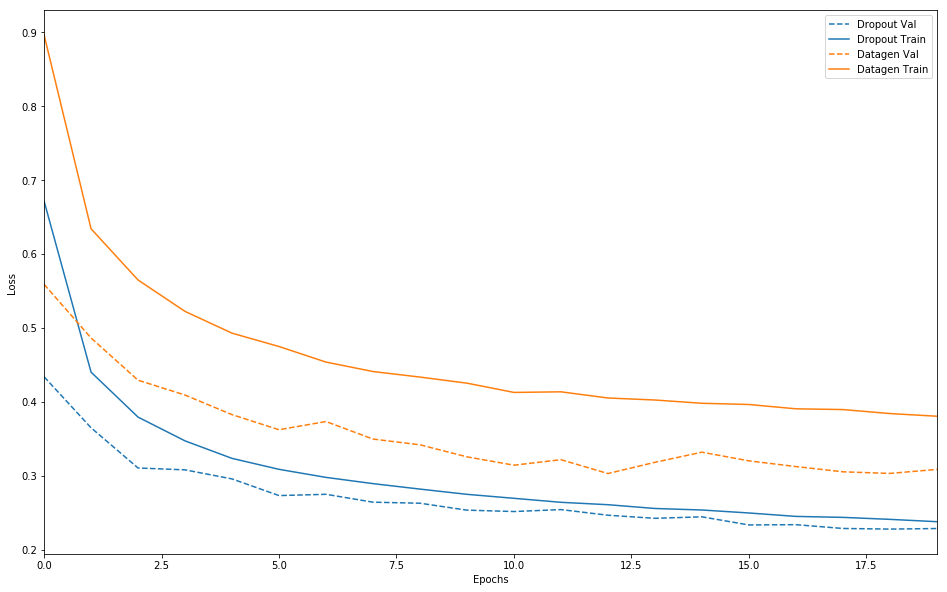

In [32]:
plot_history([('Dropout', adv_history),
              ('DataGen', dg_history)])